# MURCHIE85 TWITTER STREAM PROCESSING 



![image](https://images.complex.com/complex/image/upload/c_limit,w_680/fl_lossy,pg_1,q_auto/huja00mnx1lzwzqnoz2e.jpg)




This repo is for pulling metrics on a given keyword (best use keywords that are hashtagged) and performs a series of reporting and analysis.

## OVERVIEW

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)


## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://murchie85.github.io/images/index/fab.jpg)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [1]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [2]:
import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=10000 # max number of tweets
        self.tweet_number+=1   
        status_array.append(status._json)
        #print(status.text)
        if self.tweet_number>=self.max_tweets:
            sys.exit('Limit of '+str(self.max_tweets)+' tweets reached.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

print('Pulling down data.....')
stream.filter(track=["SexStrike"],languages=["en"])

Pulling down data.....


KeyboardInterrupt: 

# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [3]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-12 21:52:26.757938.txt


# STREAM METADATA

In [4]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')

Number of records
1271

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

An example element looks like: 


# REPORT GENERATION

In [5]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
for x in range(0, len(status_array)):
    print('************************************************************')
    print(status_array[x]['text'])
    print('------------------------------')
    print(status_array[x]['created_at'])
    print('------------------------------')
    print(status_array[x]['user']['name'])
    print('------------------------------')
    print(status_array[x]['user']['location'])
    print('------------------------------')
    print(status_array[x]['user']['description'])
    print('--------------REPLY COUNT----------------')
    print(status_array[x]['reply_count'])
    print('--------------RETWEET COUNT----------------')
    print(status_array[x]['retweet_count'])
    print('--------------RETWEETED?----------------')
    print(status_array[x]['retweeted'])
    print('--------------RETWEET COUNT----------------')
    print(status_array[x]['retweet_count'])
    print('--------------FAVOURITED----------------')
    print(status_array[x]['favorited'])
    print('--------------FAVOURITE COUNT----------------')
    print(status_array[x]['favorite_count'])
    print('')
    print('')


************************************************************
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
------------------------------
Sun May 12 20:28:09 +0000 2019
------------------------------
Lauren Anne
------------------------------
None
------------------------------
President @MOSTSyracuse. Hockey mom. Dance mom. @NewhouseSU alum '00&'01.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @LynnComella: A "sex strike" perpetuates the myth that sex is the domain of men &amp; that by striking you are denying men something they ar…
------------------------------
Sun May 12 20:28:09 +0000 2019
----

Rivendell
------------------------------
Hello There I drink Earl Grey tea w/honey. I write poetry & short stories (no yawning out there!).  http://katemcclelland01.blogspot.com
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
------------------------------
Sun May 12 20:29:24 +0000 2019
------------------------------
HRH Frank Selasie
------------------------------
Atlanta
------------------------------
The radiant one.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
-----

--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @TimRunsHisMouth: Just a quick FYI... 

Other consenting adults actually have to want to have sex with you in order for you to be able t…
------------------------------
Sun May 12 20:31:04 +0000 2019
------------------------------
Patriot's Closet
------------------------------
None
------------------------------
I took the Oath that had no expiration date.  Yuge supporter of Trump. 2A, Military, Vets, LEO's.  I follow back American Patriots.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


*******************

--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @FaithKMoore: BREAKING: Pro-choice activists discover sex makes babies. https://t.co/h5zbn8dfqG
------------------------------
Sun May 12 20:33:02 +0000 2019
------------------------------
Joshua Burgess
------------------------------
Herrin, Illinois
------------------------------
Baptized in the name of Jesus Christ on July 29th, 2018. I hope and pray for the end of abortion and the salvation of all people.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


*****************************************************

Sun May 12 20:34:29 +0000 2019
------------------------------
Adrienne
------------------------------
None
------------------------------
Focus, Clarity, Confidence #UnspeakableJOY. It all starts w Priorities. Sort your priorities now with my 30 Second Challenge online. It’s free
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @gspatton007: Lib “Sex Strike” 

This is “UNAMERICAN” 

Once again proves Libs are NOT 
TRUE Americans
What’s next Boycott Apple Pie,
Ho…
------------------------------
Sun May 12 20:34:30 +0000 2019
------------------------------
🎸Mr. McBeeVee 🎸
------------------------------
Please Help Spread The Word
------------------------------
Followed By: @RyanAFournier @GenFlynn 

0


************************************************************
😂😂😂I’m sure @jimmy_dore will weigh in on this if he hasn’t already
------------------------------
Sun May 12 20:36:19 +0000 2019
------------------------------
Anne Pickering
------------------------------
Ottawa, Canada
------------------------------
Media is bought by the Oligarchy to confuse the masses My twit spins for hours recently and I’m blocking ‘followers’ with ZERO followers🤔 Looking for a new App
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
------------------------------
Sun May 12

Kel
------------------------------
East⬛⬛⬛ WA, US⬛ 🇺🇸
------------------------------
The demise of the Republic is being live-tweeted. Find me as [⬛]kel on https://counter.social.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
Bye bye Alyssa.  You giving the younger generation a chance to build their followers. Hope you like being a has been
------------------------------
Sun May 12 20:37:22 +0000 2019
------------------------------
Corky
------------------------------
Oklahoma, USA
------------------------------
MAGA. 2020,  I do not believe in abortion, especially what they call birthday abortion. I support Israel. Believe in the electorial college. Not here to argue
--------------REPLY COUNT---

Indiana
------------------------------
✊STRENGTH AND HONOR🥁🔥#Conservative #MAGA
#BuildTheWall #DrainTheSwamp #1A #2A #AmericaFirst👌http://GAB.ai/RodStryker
#Deplorable
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
------------------------------
Sun May 12 20:39:02 +0000 2019
------------------------------
Izzy
------------------------------
ABQ
------------------------------
I am tired (and so can you!)
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEE

--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
------------------------------
Sun May 12 20:41:08 +0000 2019
------------------------------
☠️Stefan Filipovits ☠️
------------------------------
None
------------------------------
I’m just a small time bartender, writer, lover, and film noir addicted movie geek trying to make his way in the world.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @RealCandaceO: From an evolutionary perspective, the ra

0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @GymCoachMac: Waiting for #FakeFeminists like @lsarsour , @IlhanMN and @RashidaTlaib to participate in this #SexStrike .

#DemocratsAreT…
------------------------------
Sun May 12 20:42:53 +0000 2019
------------------------------
Cutie1-#SuperElite
------------------------------
None
------------------------------
#Trump2020  #ProudNationalist  #WalkAway #KAG #StandWithGenFlynn #MAGA Joined Twitter 1/16 for Trump.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


*********************************************

0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
Parody perfection.
------------------------------
Sun May 12 20:44:30 +0000 2019
------------------------------
Sheepdog Covfefe
------------------------------
Pennsylvania, USA
------------------------------
Retired Navy Senior Chief trying to brighten lives. Love all things Philadelphia, photography, Guinness, politics, beauty, tattoos, and adult. Iraq twice.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @JDArgonaut: @AOC .Great job on backped

0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @southernwayjim: So great to know that .@Alyssa_Milano will be working with @BetsyDeVosED to teach abstinence by using #SexStrike in pub…
------------------------------
Sun May 12 20:46:05 +0000 2019
------------------------------
The Pawn
------------------------------
Alabama
------------------------------
None
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @KatTheHammer1: Bette Midler joins sex strike protest....😏

#sexstrike 😂😂 https://t.c

------------------------------
Vanessa Satone 💜💀💜
------------------------------
Brooklyn
------------------------------
comic book artist, manga letterer, slacker
she/her
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
@TitaniaMcGrath The only people going to be affected by this so call #sexstrike is all of the emasculated boys you… https://t.co/CWdy4C1DvV
------------------------------
Sun May 12 20:47:58 +0000 2019
------------------------------
Ekpyrosis
------------------------------
None
------------------------------
A soul living through this age of transformation
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?--------------

RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
------------------------------
Sun May 12 20:50:05 +0000 2019
------------------------------
name
------------------------------
None
------------------------------
None
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @DevinsAchilles: Deep thoughts: I wonder if the #SexStrike started for George &amp; Kellyanne Conway the minute Kellyanne hopped on the Trum…
------------------------------
Sun May 12 20:50:06 +0000 2019
------------------------------
TheDeanofMontreal.
------------------------------
None
------------------------------
None
--------------REPLY

False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @SouthernKeeks: Groundbreaking thought: men AND women are equally responsible when it comes to sex/pregnancy. We all know how things wor…
------------------------------
Sun May 12 20:51:39 +0000 2019
------------------------------
Leah
------------------------------
Following Christ
------------------------------
Jesus is the way. I love Dean Martin/Frank Sinatra music.
Proud Conservative. 
Virtue, liberty, and independence.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
@DCFloridaChick How you dealing with the #SexStrike
------------------------------
Sun May 12 20:51:42 +0000 2

## USER DESCRIPTION NUMERICAL ANALYSIS

In [6]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_DESCRIPTION = ""
for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = status_array[x]['user']['description']
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    if str(description).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(description).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(description).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
        
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


    

187
4
16
1271


In [7]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']


      
            
top_desc = OrderedDict(x.most_common(20))
print(top_desc)


OrderedDict([('#MAGA', 65), ('all', 42), ('Trump', 41), ('🇺🇸', 36), ('love', 36), ('or', 34), ('at', 30), ('American', 29), ('more', 28), ('me', 27), ('#2A', 26), ('Proud', 25), ('God', 25), ('will', 25), ('follow', 24), ('Love', 24), ('as', 24), ("I'm", 23), ('President', 22), ('so', 21)])


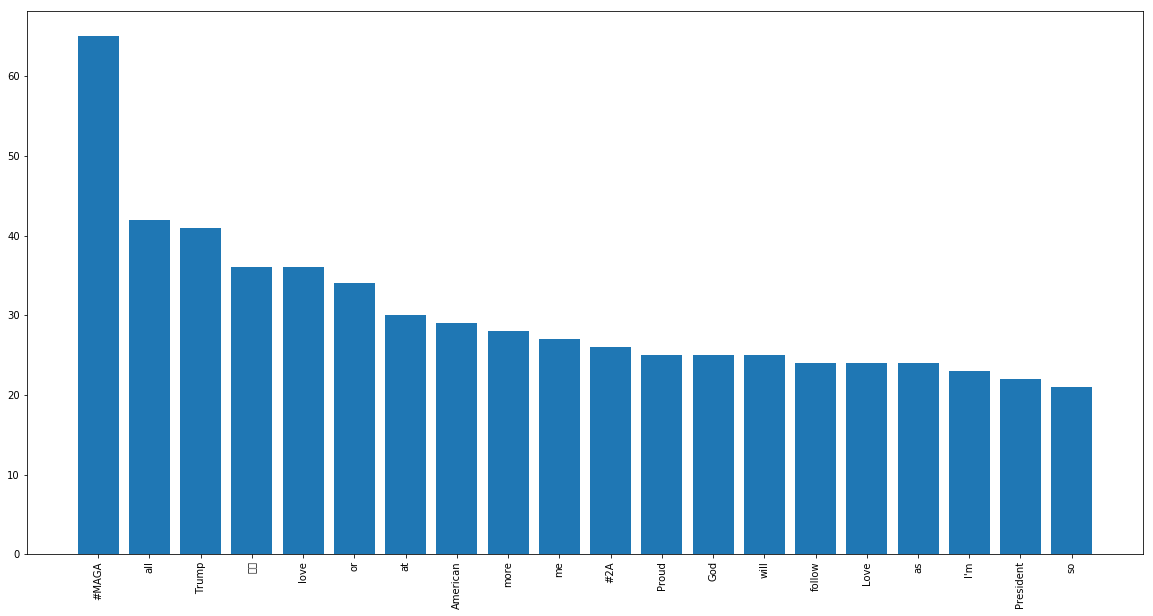

In [13]:
import matplotlib.pyplot as plt

D = top_desc

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## TWEET NUMERICAL ANALYSIS

In [9]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = status_array[x]['text']
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(text).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(text).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
        
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


25
10
42
1271


In [10]:
len(APPENDED_TEXT)

160807

In [11]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']

top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('sex', 456), ('#SexStrike', 389), ('women', 326), ('men', 169), ('we', 110), ('liberal', 109), ('#sexstrike', 102), ('@Alyssa_Milano', 89), ('get', 84), ('feel', 81), ('has', 80), ('being', 77), ('straight', 77), ('white', 77), ('@ErisofEliza:', 76), ('subtle', 75), ('confession', 75), ('strike', 67), ('absolu…RT', 66), ('We', 64)])


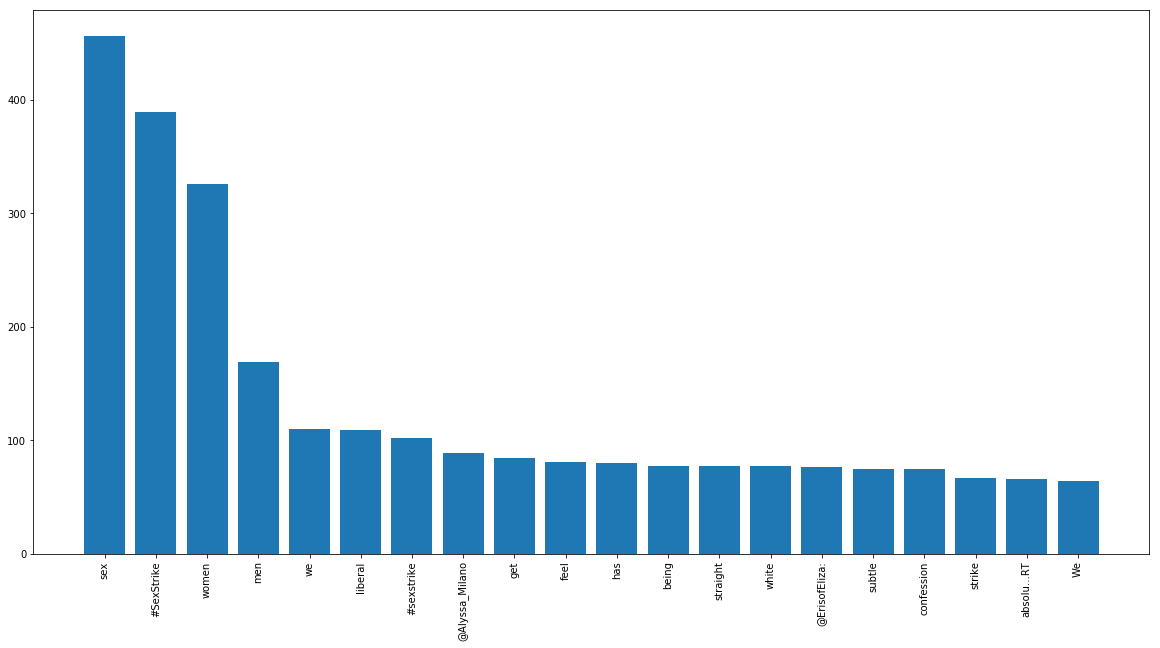

In [12]:
import matplotlib.pyplot as plt

D = top_tweets

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()
